<a href="https://colab.research.google.com/github/dohyeon-kim012/python-1./blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%20%ED%81%90%EB%A0%88%EC%9D%B4%ED%84%B0%202%EC%B0%A8/%EC%8B%A4%EC%8A%B5_1.%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITANIC 데이터 전처리

In [ ]:
import pandas as pd

In [ ]:
df_titanic= pd.read_csv('/content/drive/MyDrive/Titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_titanic.groupby("Age")['Survived'].mean()

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

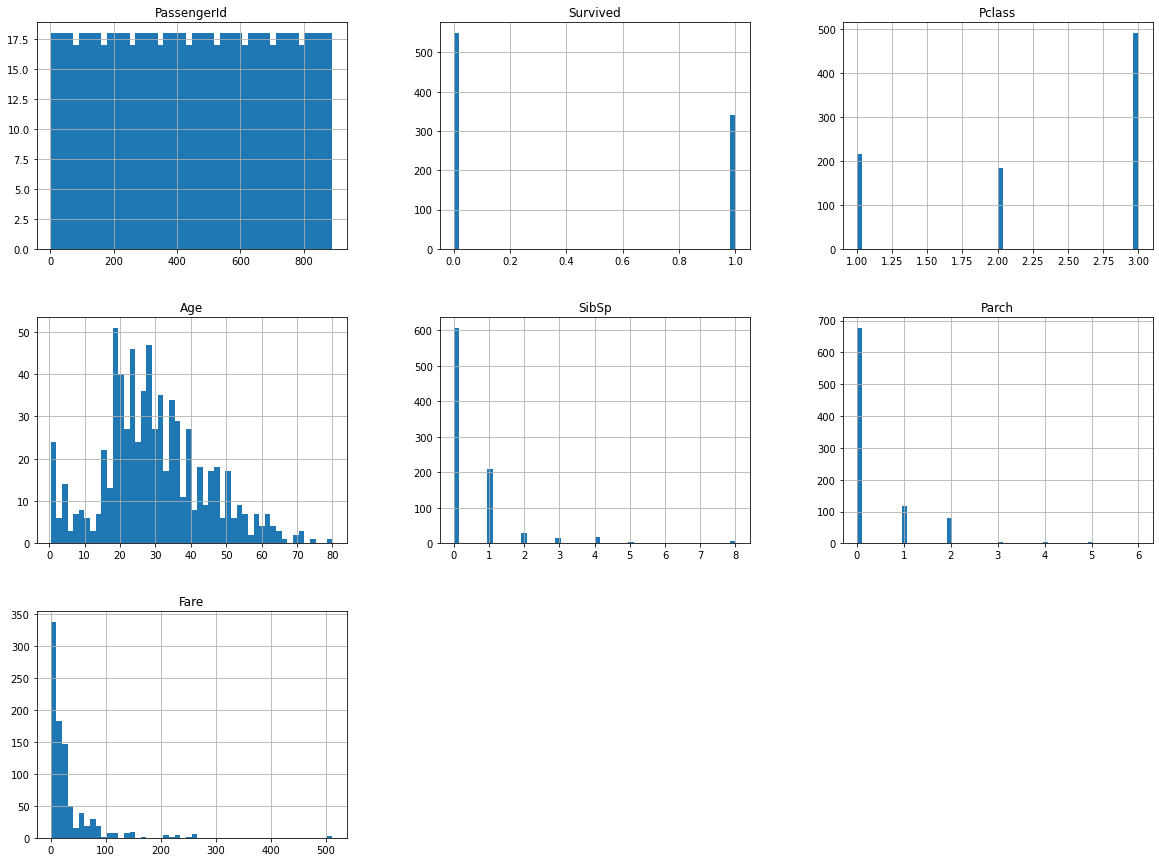

In [ ]:
import matplotlib.pyplot as plt

df_titanic.hist(bins=50, figsize=(20, 15))
plt.show()

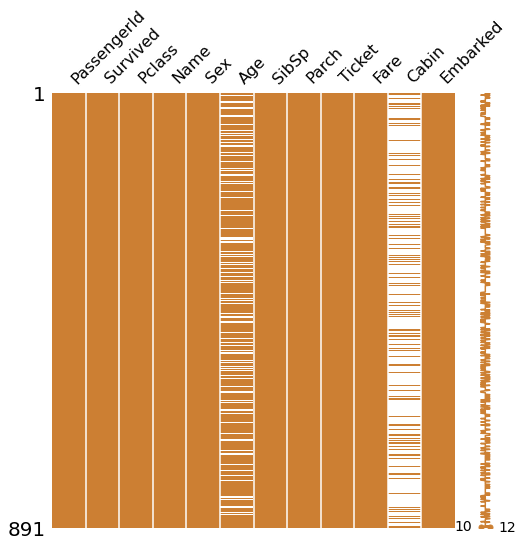

In [ ]:
# 시각화를 통해 대략적인 결측치 확인
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

msno.matrix(df_titanic.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

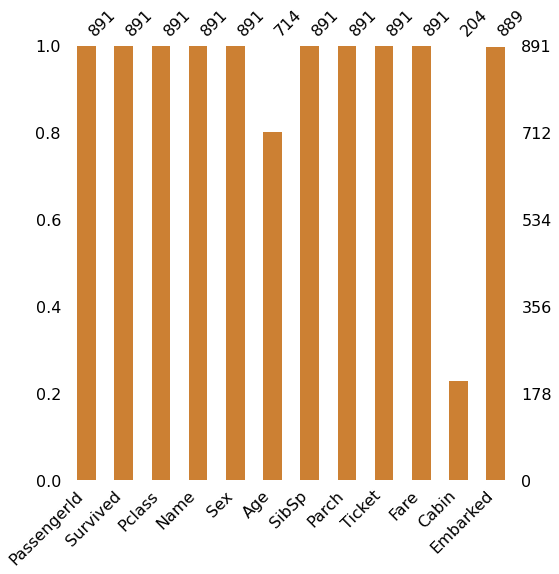

In [ ]:
msno.bar(df_titanic.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

In [ ]:
# Cabin 값 드랍
df_titanic.drop("Cabin", axis=1, inplace=True)

In [ ]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## 상관관계

In [ ]:
# 상관관계 확인
corr_matrix = df_titanic.corr()

corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Fare 과 Pclass가 그나마 큰 수이지만, 둘 다 보통의 상관관계 정도로 큰 연관성은 없어 보임

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e87e9fb50>,
      dtype=object)

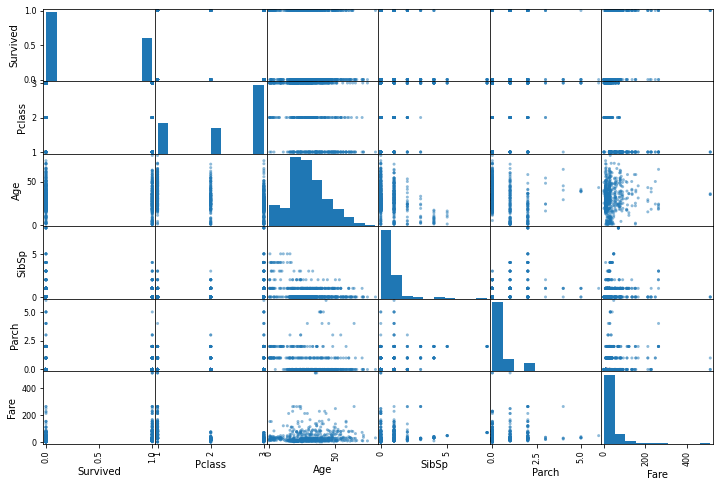

In [ ]:
from pandas.plotting import scatter_matrix

feature_names = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Embarked"]
scatter_matrix(df_titanic[feature_names], figsize=(12, 8))

히스토그램을 통한 상관관계의 분석이 어려워 세부 그래프를 통해 다시 확인

## 시각화

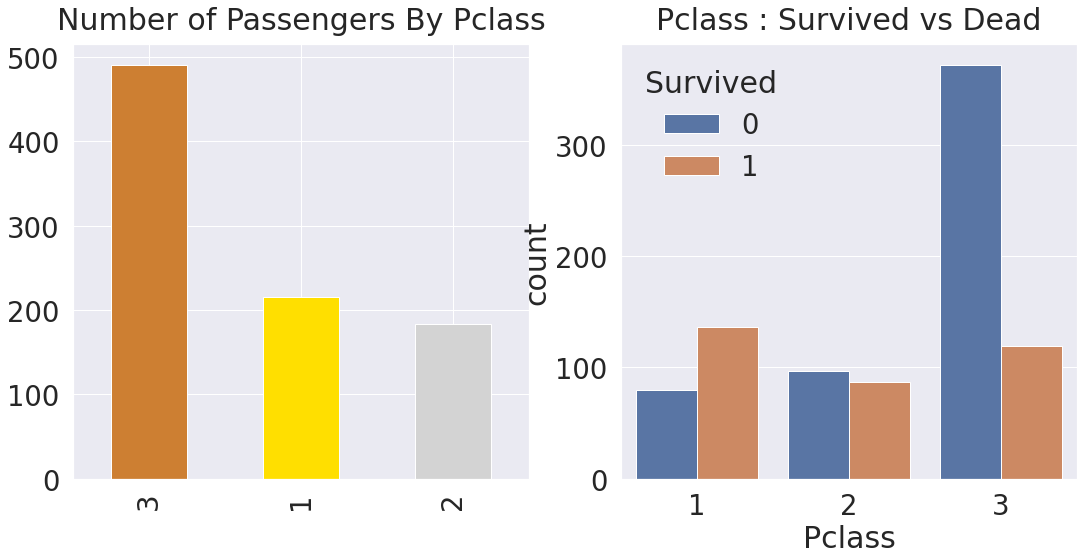

In [ ]:
# pclass에 따른 승객 수와 사망자수 시각화
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

y_position = 1.02
fig, ax = plt.subplots(1,2,figsize=(18,8))
df_titanic['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)

sns.countplot('Pclass', hue='Survived', data=df_titanic, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y=y_position)
plt.show()

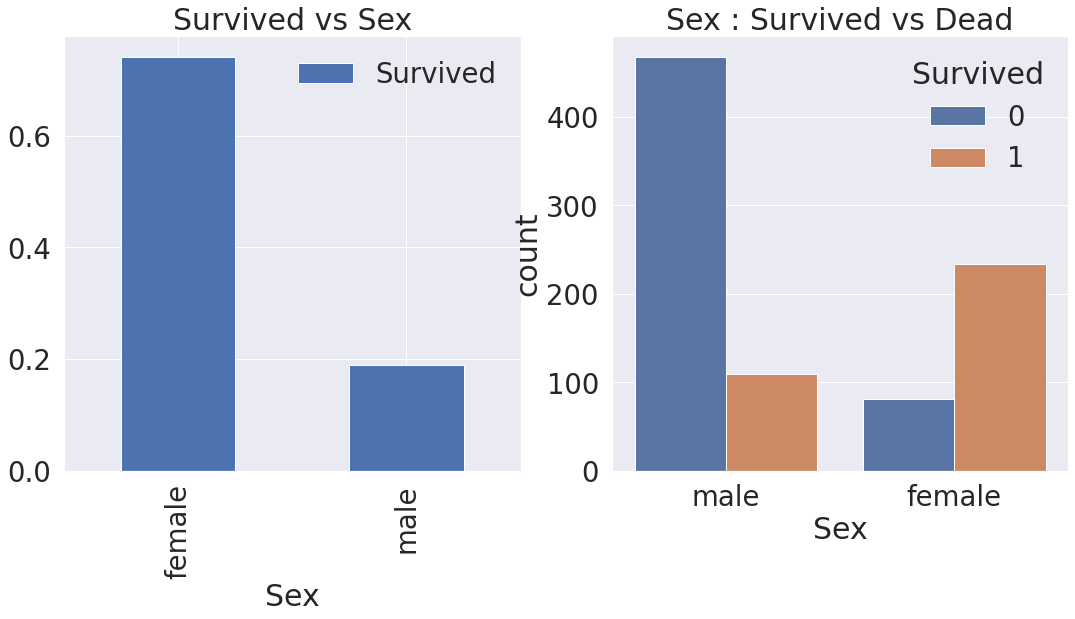

In [ ]:
# 성별에 따른 사망자 수 시각화

fig, ax = plt.subplots(1,2, figsize=(18,8))
df_titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_titanic, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

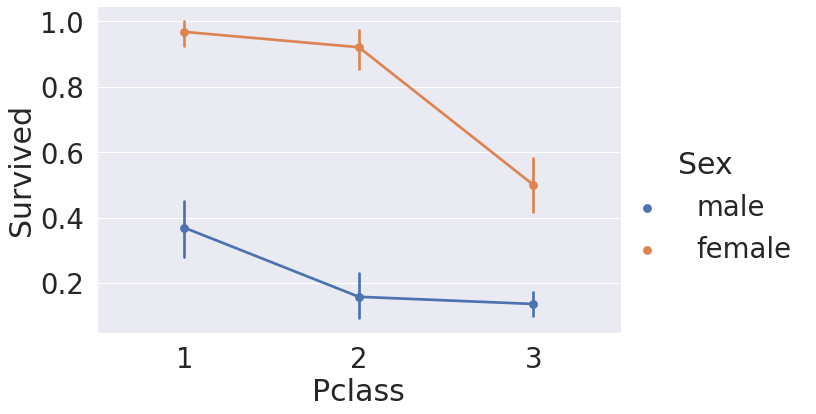

In [ ]:
# 성별과 pclass 에 따른 생존률 조사

sns.factorplot('Pclass', 'Survived', hue = 'Sex', data=df_titanic, size=6, aspect=1.5)

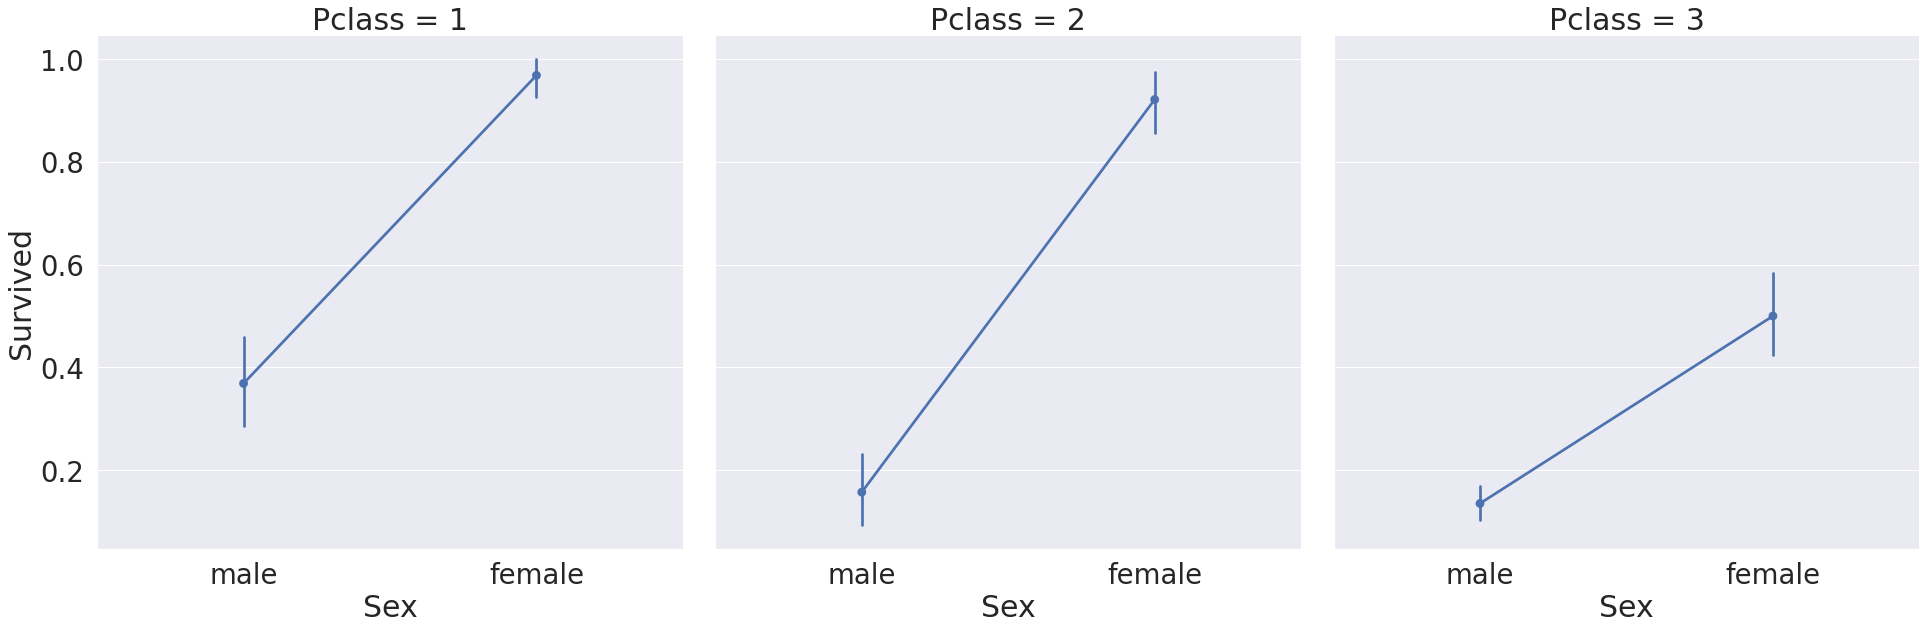

In [ ]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_titanic, saturation=.5,
              size=9, aspect=1)

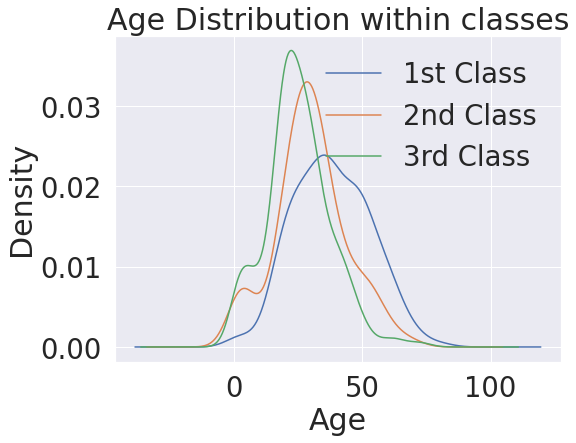

In [ ]:
# pclass에 대한 나이 분포율

plt.figure(figsize=(8, 6))
df_titanic.dropna()['Age'][df_titanic.dropna()['Pclass'] == 1].plot(kind='kde')
df_titanic.dropna()['Age'][df_titanic.dropna()['Pclass'] == 2].plot(kind='kde')
df_titanic.dropna()['Age'][df_titanic.dropna()['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

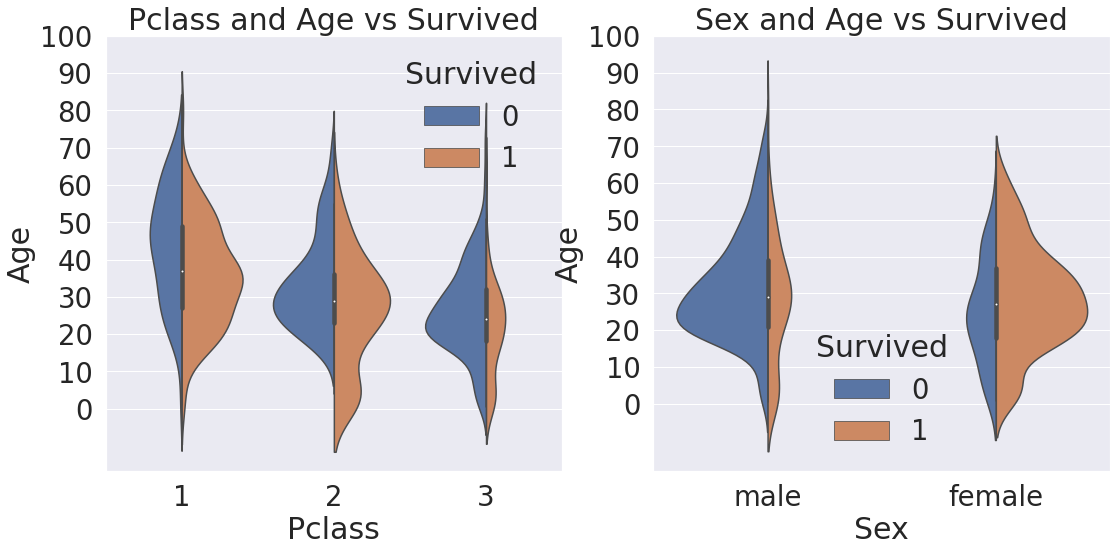

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_titanic, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex","Age", hue="Survived", data=df_titanic, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

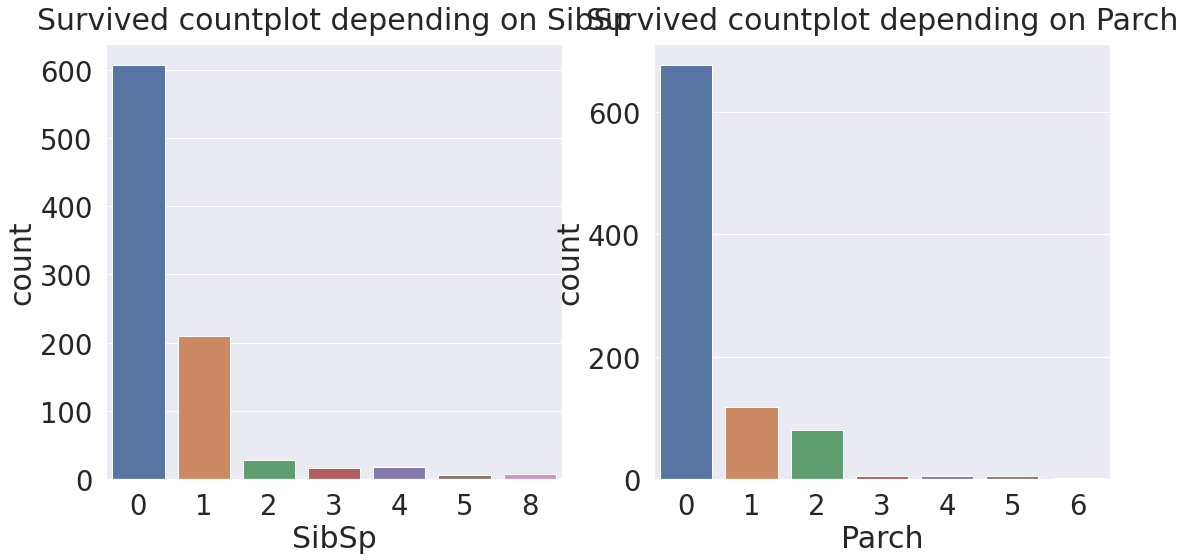

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.countplot("SibSp", data=df_titanic, ax=ax[0])
ax[0].set_title("Survived countplot depending on SibSp", y=1.02)

sns.countplot("Parch", data=df_titanic, ax=ax[1])
ax[1].set_title("Survived countplot depending on Parch", y=1.02)

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    df_titanic.drop("Survived", axis=1), 
    df_titanic['Survived'],
    random_state=42
) 

In [ ]:
X_train.shape, y_train.shape

((668, 10), (668,))

In [ ]:
X_valid.shape, y_valid.shape

((223, 10), (223,))

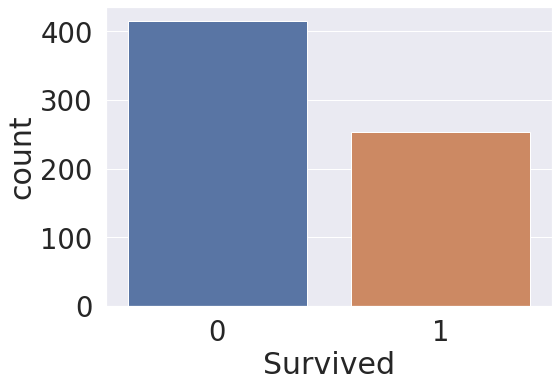

In [ ]:
sns.countplot(y_train)
plt.show()
# 비율을 맞추기 위해 계층 분할이 먼저 필요함

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(
    df_titanic.drop("Survived", axis=1), 
    df_titanic['Survived'],
    random_state=42,
    stratify=df_titanic['Survived']
) 

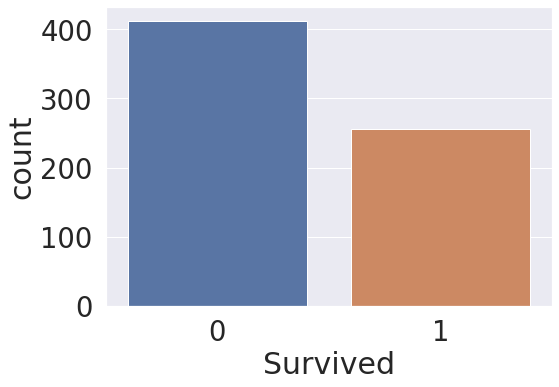

In [ ]:
sns.countplot(y_train)
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuff_split = StratifiedShuffleSplit(
    n_splits=1, 
    test_size=0.2,
    random_state=42
)

# strat_shuff_split을 income_cat의 데이터를 기준으로  쪼개게 되면(split) train / test 데이터의 인덱스가 등장
for train_index, test_index in strat_shuff_split.split(df_titanic, df_titanic["Survived"]):
    strat_train_set = df_titanic.loc[train_index]
    strat_test_set = df_titanic.loc[test_index]

In [ ]:
strat_test_set['Survived'].value_counts() / len(strat_test_set)

0    0.614525
1    0.385475
Name: Survived, dtype: float64

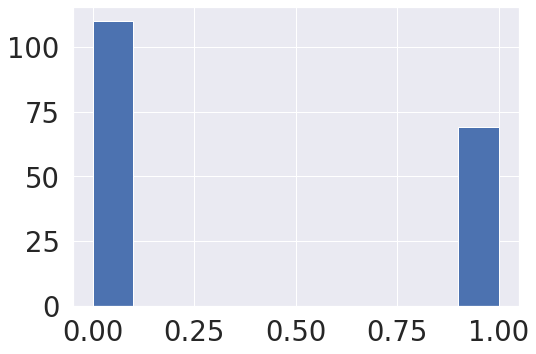

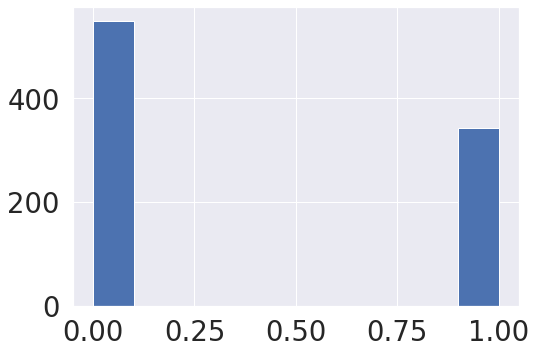

In [ ]:
strat_test_set['Survived'].hist()
plt.figure()  # 계층적 샘플링 진행 후 히스토그램으로 시각화해서 확인
df_titanic['Survived'].hist()
plt.show()

두 번의 샘플링 편향 과정을 진행했으나 결과값 변화 없음  
이대로 머신러닝 진행

## 머신러닝을 위한 데이터 준비



### 1. feature 정제

In [ ]:
from sklearn.impute import SimpleImputer

Imputer = SimpleImputer(strategy="median")

In [ ]:
titanic = X_train

titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 486 to 821
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Pclass       668 non-null    int64  
 2   Name         668 non-null    object 
 3   Sex          668 non-null    object 
 4   Age          537 non-null    float64
 5   SibSp        668 non-null    int64  
 6   Parch        668 non-null    int64  
 7   Ticket       668 non-null    object 
 8   Fare         668 non-null    float64
 9   Embarked     666 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 57.4+ KB


In [ ]:
# 문자열을 제외하고 숫자로만 구성된 변수 생성
titanic_num = titanic.drop(["Name", "Sex", "Ticket", "Embarked"], axis=1)
titanic_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 486 to 821
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Pclass       668 non-null    int64  
 2   Age          537 non-null    float64
 3   SibSp        668 non-null    int64  
 4   Parch        668 non-null    int64  
 5   Fare         668 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 36.5 KB


In [ ]:
Imputer.fit(titanic_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:
Imputer.statistics_

array([440.5   ,   3.    ,  29.    ,   0.    ,   0.    ,  13.8604])

In [ ]:
titanic_num.median().values

array([440.5   ,   3.    ,  29.    ,   0.    ,   0.    ,  13.8604])

In [ ]:
X = Imputer.transform(titanic_num)

In [ ]:
X

array([[487.    ,   1.    ,  35.    ,   1.    ,   0.    ,  90.    ],
       [239.    ,   2.    ,  19.    ,   0.    ,   0.    ,  10.5   ],
       [723.    ,   2.    ,  34.    ,   0.    ,   0.    ,  13.    ],
       ...,
       [737.    ,   3.    ,  48.    ,   1.    ,   3.    ,  34.375 ],
       [463.    ,   1.    ,  47.    ,   0.    ,   0.    ,  38.5   ],
       [822.    ,   3.    ,  27.    ,   0.    ,   0.    ,   8.6625]])

In [ ]:
titanic_tr = pd.DataFrame(
    X,
    columns=titanic_num.columns,
    index=titanic_num.index
)

titanic_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 486 to 821
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    float64
 1   Pclass       668 non-null    float64
 2   Age          668 non-null    float64
 3   SibSp        668 non-null    float64
 4   Parch        668 non-null    float64
 5   Fare         668 non-null    float64
dtypes: float64(6)
memory usage: 36.5 KB


Age의 null 값이 모두 채워진 것 확인

### 2. 텍스트 데이터 Encoding하기

Object 데이터 중 'Name'과 'Sex'만 사용할 것이니 두 개만 바꿔주기

1. Sex 인코딩

In [ ]:
titanic_cat_sex = titanic[["Sex"]]
titanic_cat_sex.head()

,Sex
486,female
238,male
722,male
184,female
56,female


In [ ]:
titanic_cat_sex["Sex"].unique()

array(['female', 'male'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

titanic_cat_sex_encoded = ordinal_encoder.fit_transform(titanic_cat_sex.values)

titanic_cat_sex_encoded[:10]

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.]])

In [ ]:
ordinal_encoder.categories_

[array(['female', 'male'], dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

titanic_cat_sex_onehot = cat_encoder.fit_transform(titanic_cat_sex)
titanic_cat_sex_onehot

<668x2 sparse matrix of type '<class 'numpy.float64'>'
	with 668 stored elements in Compressed Sparse Row format>

In [ ]:
titanic_cat_sex_onehot_df = pd.DataFrame(
    titanic_cat_sex_onehot.toarray(),
    columns=cat_encoder.categories_,
    index=titanic_cat_sex.index
)

titanic_cat_sex_onehot_df.head()

,female,male
486,1.0,0.0
238,0.0,1.0
722,0.0,1.0
184,1.0,0.0
56,1.0,0.0


2. 'Name' Encoding

In [ ]:
titanic['Initial'] = titanic.Name.str.extract('([A-Za-z]+)\.')
# y_train['Initial'] = y_train.Name.str.extract('([A-Za-z]+)\.')
X_valid['Initial'] = X_valid.Name.str.extract('([A-Za-z]+)\.')
# y_test['Initial'] = y_test.Name.str.extract('([A-Za-z]+)\.')
strat_test_set['Initial'] = titanic.Name.str.extract('([A-Za-z]+)\.')

In [ ]:
pd.crosstab(titanic['Initial'], titanic['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mr,Mrs,Rev,Sir
Sex,,,,,,,,,,,,,
female,0,0,1,0,1,0,0,133,2,0,97,0,0
male,2,1,5,1,0,1,28,0,0,390,0,5,1


In [ ]:
pd.crosstab(X_valid['Initial'], X_valid['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Countess,Dr,Major,Master,Miss,Mme,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,,,
female,0,1,0,0,0,49,1,0,28,1,0
male,1,0,1,1,12,0,0,127,0,0,1


In [ ]:
titanic['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

X_valid['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

strat_test_set['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

titanic.groupby('Initial').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Initial,,,,,,
Master,412.250000,2.607143,3.866800,2.250000,1.357143,33.323514
Miss,416.296296,2.288889,21.533784,0.570370,0.511111,44.739848
Mr,453.714286,2.411028,32.750000,0.265664,0.127820,22.674758
Mrs,449.367347,1.918367,36.540230,0.642857,0.938776,47.423044
Other,524.125000,1.625000,48.250000,0.125000,0.125000,19.865625


In [ ]:
titanic_cat_ini = titanic[["Initial"]]
titanic_cat_ini.head()

,Initial
486,Mrs
238,Mr
722,Mr
184,Miss
56,Miss


In [ ]:
titanic_cat_ini_encoded = ordinal_encoder.fit_transform(titanic_cat_ini.values)

titanic_cat_ini_encoded[:10]

array([[3.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [3.],
       [2.],
       [3.],
       [4.]])

In [ ]:
ordinal_encoder.categories_

[array(['Master', 'Miss', 'Mr', 'Mrs', 'Other'], dtype=object)]

In [ ]:
titanic_cat_ini_onehot = cat_encoder.fit_transform(titanic_cat_ini)
titanic_cat_ini_onehot

<668x5 sparse matrix of type '<class 'numpy.float64'>'
	with 668 stored elements in Compressed Sparse Row format>

In [ ]:
titanic_cat_ini_onehot_df = pd.DataFrame(
    titanic_cat_ini_onehot.toarray(),
    columns=cat_encoder.categories_,
    index=titanic_cat_ini.index
)

titanic_cat_ini_onehot_df.head()

,Master,Miss,Mr,Mrs,Other
486,0.0,0.0,0.0,1.0,0.0
238,0.0,0.0,1.0,0.0,0.0
722,0.0,0.0,1.0,0.0,0.0
184,0.0,1.0,0.0,0.0,0.0
56,0.0,1.0,0.0,0.0,0.0


이름과 성별은 원 핫 인코딩을 통해 숫자로 바꿔주었음

In [ ]:
titanic_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 486 to 821
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Pclass       668 non-null    int64  
 2   Age          537 non-null    float64
 3   SibSp        668 non-null    int64  
 4   Parch        668 non-null    int64  
 5   Fare         668 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 56.5 KB


### 3. 파이프라인 구축하기

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                         ("imputer", SimpleImputer(strategy="median")),
                         ("std_scaler", StandardScaler())
])

titanic_num.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
486,487,1,35.0,1,0,90.000
238,239,2,19.0,0,0,10.500
722,723,2,34.0,0,0,13.000
184,185,3,4.0,0,2,22.025
56,57,2,21.0,0,0,10.500


In [ ]:
titanic_num_tr = num_pipeline.fit_transform(titanic_num)
titanic_num_tr[:5]

array([[ 0.16359761, -1.5793344 ,  0.40533335,  0.53667675, -0.4514834 ,
         1.24039702],
       [-0.79374025, -0.37637502, -0.82976403, -0.46472009, -0.4514834 ,
        -0.43602802],
       [ 1.07461267, -0.37637502,  0.32813977, -0.46472009, -0.4514834 ,
        -0.38331025],
       [-1.00219284,  0.82658437, -1.98766783, -0.46472009,  1.95163141,
        -0.19299911],
       [-1.49630271, -0.37637502, -0.67537686, -0.46472009, -0.4514834 ,
        -0.43602802]])

In [ ]:
from sklearn.compose import ColumnTransformer

num_feature_name = list(titanic_num.columns)
name_feature_name = ['Initial']
sex_feature_name = ['Sex']

full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_feature_name),
                                   ("name", OneHotEncoder(), name_feature_name),
                                   ("sex", OneHotEncoder(), sex_feature_name)
])

titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial
486,487,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.000,S,Mrs
238,239,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.500,S,Mr
722,723,2,"Gillespie, Mr. William Henry",male,34.0,0,0,12233,13.000,S,Mr
184,185,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.025,S,Miss
56,57,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.500,S,Miss


In [ ]:
titanic_final = full_pipeline.fit_transform(titanic)
titanic_final[:5]

array([[ 0.16359761, -1.5793344 ,  0.40533335,  0.53667675, -0.4514834 ,
         1.24039702,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ],
       [-0.79374025, -0.37637502, -0.82976403, -0.46472009, -0.4514834 ,
        -0.43602802,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [ 1.07461267, -0.37637502,  0.32813977, -0.46472009, -0.4514834 ,
        -0.38331025,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [-1.00219284,  0.82658437, -1.98766783, -0.46472009,  1.95163141,
        -0.19299911,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ],
       [-1.49630271, -0.37637502, -0.67537686, -0.46472009, -0.4514834 ,
        -0.43602802,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ]])

파이프라인 다 만들었음  
이후에는 별도의 데이터 변환 없이 파이프라인을 사용하면 됨

# 머신러닝 알고리즘 모델 선택 및 훈련



## 1) 선형회귀 알고리즘 LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(titanic_final, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
example_train_data = titanic.iloc[:5]
example_labels = y_train[:5]

In [ ]:
example_train_prepared = full_pipeline.transform(example_train_data)
example_train_prepared

array([[ 0.16359761, -1.5793344 ,  0.40533335,  0.53667675, -0.4514834 ,
         1.24039702,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ],
       [-0.79374025, -0.37637502, -0.82976403, -0.46472009, -0.4514834 ,
        -0.43602802,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [ 1.07461267, -0.37637502,  0.32813977, -0.46472009, -0.4514834 ,
        -0.38331025,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [-1.00219284,  0.82658437, -1.98766783, -0.46472009,  1.95163141,
        -0.19299911,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ],
       [-1.49630271, -0.37637502, -0.67537686, -0.46472009, -0.4514834 ,
        -0.43602802,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ]])

In [ ]:
pred = lin_reg.predict(example_train_prepared)
label = list(example_labels)

print("예측 : {}".format(pred))
print("타깃 : {}".format(label))

예측 : [0.96948953 0.28245549 0.23595297 0.64600312 0.81013158]
타깃 : [1, 0, 0, 1, 1]


오차가 꽤 크고 예측이 잘 안 되어있음

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

titanic_pred = lin_reg.predict(titanic_final)

lin_mse = mean_squared_error(titanic_pred, y_train)

lin_rmse = np.sqrt(lin_mse)

print("MSE : {:.3f} / RMSE : {:.3f}".format(lin_mse, lin_rmse))

MSE : 0.132 / RMSE : 0.363


## 2) 의사결정트리 모델

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(titanic_final, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
example_train_data = titanic.iloc[:5]
example_labels = y_train[:5]
example_train_prepared = full_pipeline.transform(example_train_data)

In [ ]:
pred = tree_reg.predict(example_train_prepared)
label = list(example_labels)

print("예측 : {}".format(pred))
print("타깃 : {}".format(label))

예측 : [1. 0. 0. 1. 1.]
타깃 : [1, 0, 0, 1, 1]


In [ ]:
titanic_pred = tree_reg.predict(titanic_final)

tree_mse = mean_squared_error(titanic_pred, y_train)

tree_rmse = np.sqrt(tree_mse)

print("MSE : {:.3f} / RMSE : {:.3f}".format(tree_mse, tree_rmse))

MSE : 0.000 / RMSE : 0.000


## 3) 로지스틱 회귀 LogisticRegression

In [ ]:
titanic = full_pipeline.transform(titanic)
X_valid = full_pipeline.transform(X_valid)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [ ]:
model.fit(titanic, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction = model.predict(X_valid)
prediction

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0])

In [ ]:
(prediction == y_valid).mean()

0.8251121076233184

## 4) SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd = SGDClassifier(random_state=0)

In [ ]:
sgd.fit(titanic, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
prediction = sgd.predict(X_valid)

(prediction == y_valid).mean()

0.7085201793721974

## 5) KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(titanic, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_valid, y_valid)

0.7982062780269058

## 6) SupportVectorClassifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(random_state=0)
svc.fit(titanic, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc.score(titanic, y_train)

0.8413173652694611

In [ ]:
svc.score(X_valid, y_valid)

0.820627802690583

## 7) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(titanic, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
dt.score(X_valid, y_valid)

0.7219730941704036

In [ ]:
dt.score(titanic, y_train)

1.0

지금까지의 모델 중 가장 오차가 큼  
(기본적으로 최대한 과대적합 되어있기 때문에?)

In [ ]:
# depth 조절해보기
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(titanic, y_train)
dt.score(titanic, y_train)

0.8323353293413174

In [ ]:
dt.score(X_valid, y_valid)

0.8340807174887892

## 8) 랜던포레스트 RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(titanic_final, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
titanic_pred = forest_reg.predict(titanic_final)
forest_mse = mean_squared_error(y_train, titanic_pred)
forest_rmse = np.sqrt(forest_mse)

print("MSE : {:.3f} / RMSE : {:.3f}".format(forest_mse, forest_rmse))

MSE : 0.019 / RMSE : 0.139


## 교차 검증 ( Cross Validation )

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    tree_reg,  # 의사결정트리 모델로 교차 검증 시도
    titanic_final,
    y_train,
    cv=10,
    scoring='neg_mean_squared_error'
)

tree_rmse_scores = np.sqrt(-scores)
print(tree_rmse_scores.mean())

0.48796869375715585


In [ ]:
# '정확도' 도 확인
scores = cross_val_score(
    tree_reg,  
    titanic_final,
    y_train,
    cv=10
)

print(scores.mean())

-0.0026904139239162794


In [ ]:
# LinearRegression에 대한 CV점수 확인

lin_scores = cross_val_score(
    lin_reg, 
    titanic_final,
    y_train,
    cv=10,
    scoring='neg_mean_squared_error'
)

lin_rmse_scores = np.sqrt(-lin_scores)
print(lin_rmse_scores.mean())

0.3674277516203971


In [ ]:
# LogisticRegression에 대한 CV 점수 확인

log_scores = cross_val_score(
    model, 
    titanic_final,
    y_train,
    cv=10,
    scoring='neg_mean_squared_error'
)

log_rmse_scores = np.sqrt(-log_scores)
print(log_rmse_scores.mean())

0.4136589315124361


In [ ]:
# SGDClassifier에 대한 CV 점수 확인

sgd_scores = cross_val_score(
    sgd, 
    titanic_final,
    y_train,
    cv=10,
    scoring='neg_mean_squared_error'
)

sgd_rmse_scores = np.sqrt(-sgd_scores)
print(sgd_rmse_scores.mean())

0.48088345993386605


In [ ]:
# KNeighborsClassifier에 대한 CV 점수 확인

knn_scores = cross_val_score(
    knn, 
    titanic_final,
    y_train,
    cv=10,
    scoring='neg_mean_squared_error'
)

knn_rmse_scores = np.sqrt(-knn_scores)
print(knn_rmse_scores.mean())

0.4199866554090878


In [ ]:
# SupportVectorClassifier에 대한 CV 점수 확인

svc_scores = cross_val_score(
    svc, 
    titanic_final,
    y_train,
    cv=10,
    scoring='neg_mean_squared_error'
)

svc_rmse_scores = np.sqrt(-svc_scores)
print(svc_rmse_scores.mean())

0.4061176577097238


In [ ]:
# DecisionTreeClassifier에 대한 CV 점수 확인

dt_scores = cross_val_score(
    dt, 
    titanic_final,
    y_train,
    cv=10,
    scoring='neg_mean_squared_error'
)

dt_rmse_scores = np.sqrt(-dt_scores)
print(dt_rmse_scores.mean())

0.4307767985494267


In [ ]:
# RandomForestRegressor에 대한 CV 점수 확인

forest_reg_scores = cross_val_score(
    forest_reg, 
    titanic_final,
    y_train,
    cv=10,
    scoring='neg_mean_squared_error'
)

forest_reg_rmse_scores = np.sqrt(-forest_reg_scores)
print(forest_reg_rmse_scores.mean())

0.3696512181924204


총 8개의 모델에 대한 교차 검증 결과, 선형회귀 알고리즘 LinearRegression의 오차가 제일 작다는 것을 알 수 있다

### 복잡도 조절 GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

opt1 = {
    "n_estimators":[3, 10, 30],
    "max_features":[2, 4, 6, 8]
}

opt2 = {
    "bootstrap":[False],
    "n_estimators":[3, 10],
    "max_features":[2, 3, 4]
}

params = [ opt1, opt2 ]

In [ ]:
grid_search = GridSearchCV(
    RandomForestRegressor(),
    params,
    cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

grid_search.fit(titanic_final, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
# grid_search = GridSearchCV(
#     LinearRegression(),
#     params,
#     cv=5,
#     scoring="neg_mean_squared_error",
#     return_train_score=True
# )

In [ ]:
# 오류 발생! 왜??

# grid_search.fit(titanic_final, y_train)
# grid_search.score(titanic_final, y_valid)

In [ ]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
res = grid_search.cv_results_

for mean_score, params in zip(res['mean_test_score'], res['params']):
    print(np.sqrt(-mean_score), params)

0.4189342776637029 {'max_features': 2, 'n_estimators': 3}
0.3769557164505404 {'max_features': 2, 'n_estimators': 10}
0.3633242714724349 {'max_features': 2, 'n_estimators': 30}
0.4068163834214062 {'max_features': 4, 'n_estimators': 3}
0.3709323965072184 {'max_features': 4, 'n_estimators': 10}
0.3669110056687777 {'max_features': 4, 'n_estimators': 30}
0.425859573116143 {'max_features': 6, 'n_estimators': 3}
0.37743055138656184 {'max_features': 6, 'n_estimators': 10}
0.3740810175461663 {'max_features': 6, 'n_estimators': 30}
0.41449683777327717 {'max_features': 8, 'n_estimators': 3}
0.3825315388098956 {'max_features': 8, 'n_estimators': 10}
0.36689763285000226 {'max_features': 8, 'n_estimators': 30}
0.410749705587123 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.3859934068233532 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.416582305453763 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.3896656255584935 {'bootstrap': False, 'max_features': 3, 'n

### <<오류 발생>> 결과가 제일 좋았던 best_estimator로 최종 Evaluate

In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
X_valid.shape

(223, 13)

In [ ]:
X_valid = X_valid.reshape(-1, 1)

In [ ]:
X_valid

array([[-1.10641914],
       [ 0.82658437],
       [ 0.01936542],
       ...,
       [ 0.        ],
       [ 0.        ],
       [ 1.        ]])

In [ ]:
titanic

array([[ 0.16359761, -1.5793344 ,  0.40533335, ...,  0.        ,
         1.        ,  0.        ],
       [-0.79374025, -0.37637502, -0.82976403, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.07461267, -0.37637502,  0.32813977, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.12865594,  0.82658437,  1.40884998, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07095201, -1.5793344 ,  1.33165639, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.45677577,  0.82658437, -0.21221534, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.1500,S,NaN
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,S,NaN
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,C,NaN
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,S,NaN
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,Q,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S,NaN
91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,S,NaN
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S,NaN
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,C,NaN


In [ ]:
strat_test_set.drop("Cabin", axis=1, inplace=True)

KeyError: ignored

In [ ]:
strat_test_set_final = full_pipeline.transform(strat_test_set)

ValueError: ignored

In [ ]:
X_test = strat_test_set_final.drop("Survived", axis=1)
Y_test = strat_test_set_final["Survived"].copy()

X_test_final = full_pipeline.transform(X_test)
final_pred = final_model.predict(X_test_final)

final_mse = mean_squared_error(Y_test, final_pred)
final_rmse = np.sqrt(final_mse)

print(final_rmse)

In [ ]:
final_pred = final_model.predict(X_valid)

final_mse = mean_squared_error(X_valid, )